In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import glob
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [ ]:

d1 = pd.concat([pd.read_csv(i) for i in glob.glob('dataset/customers*.csv')], ignore_index=True)
d2 = pd.concat([pd.read_csv(i) for i in glob.glob('dataset/orders*.csv')], ignore_index=True)
d3 = pd.concat([pd.read_csv(i) for i in glob.glob('dataset/products*.csv')], ignore_index=True)
d4 = pd.concat([pd.read_csv(i) for i in glob.glob('dataset/sales*.csv')], ignore_index=True)

d3.rename(columns={'product_ID': 'product_id'}, inplace=True)


data = pd.merge(d1, d2, on='customer_id')
data = pd.merge(data, d4, on='order_id')
data = pd.merge(data, d3, on='product_id')


print(f"{data.shape[0]} Rows & {data.shape[1]} Columns:")
data.head(10)



5000 Rows & 25 Columns:


,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,455,...,106,3,318,Shirt,Chambray,S,red,105,72,"A red coloured, S sized, Chambray Shirt"
1,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,455,...,91,2,182,Jacket,Pullover,L,yellow,114,43,"A yellow coloured, L sized, Pullover Jacket"
2,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,670,...,98,2,196,Jacket,Leather,XS,red,113,67,"A red coloured, XS sized, Leather Jacket"
3,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,670,...,91,2,182,Jacket,Pullover,M,blue,114,44,"A blue coloured, M sized, Pullover Jacket"
4,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,670,...,98,1,98,Shirt,Camp Collared,XL,red,112,79,"A red coloured, XL sized, Camp Collared Shirt"
5,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,670,...,91,3,273,Jacket,Pullover,XL,green,114,65,"A green coloured, XL sized, Pullover Jacket"
6,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,729,...,98,3,294,Shirt,Camp Collared,M,blue,112,65,"A blue coloured, M sized, Camp Collared Shirt"
7,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,729,...,98,1,98,Jacket,Leather,L,violet,113,78,"A violet coloured, L sized, Leather Jacket"
8,7,Winslow Ewbanck,Bigender,76,92 Hills Station StApt. 683,793,Masonfurt,Queensland,Australia,465,...,115,3,345,Trousers,Cropped,L,violet,99,40,"A violet coloured, L sized, Cropped Trousers"
9,7,Winslow Ewbanck,Bigender,76,92 Hills Station StApt. 683,793,Masonfurt,Queensland,Australia,465,...,112,2,224,Trousers,Tracksuit Bottoms,XL,violet,91,60,"A violet coloured, XL sized, Tracksuit Bottoms..."


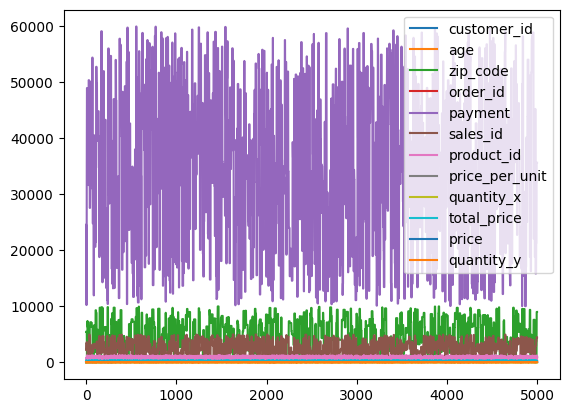

In [ ]:
data.plot()
plt.show()

In [ ]:
feature_column = [ "customer_id", "customer_name", "gender", "age", "home_address", "zip_code",
"city", "state", "country", "order_id", "price_per_unit",  "quantity_x", "total_price", "product_type",
"product_name", "size", "colour", "price", "quantity_y", "description"]

data['product_name_length'] = data['product_name'].str.len()

x = data[feature_column]
print(x)


      customer_id     customer_name  gender  age  \
0               1     Leanna Busson  Female   30   
1               1     Leanna Busson  Female   30   
2               1     Leanna Busson  Female   30   
3               1     Leanna Busson  Female   30   
4               1     Leanna Busson  Female   30   
...           ...               ...     ...  ...   
4995         1000  Mandel Fairbanks    Male   71   
4996         1000  Mandel Fairbanks    Male   71   
4997         1000  Mandel Fairbanks    Male   71   
4998         1000  Mandel Fairbanks    Male   71   
4999         1000  Mandel Fairbanks    Male   71   

                        home_address  zip_code                city  \
0     8606 Victoria TerraceSuite 560      5464       Johnstonhaven   
1     8606 Victoria TerraceSuite 560      5464       Johnstonhaven   
2     8606 Victoria TerraceSuite 560      5464       Johnstonhaven   
3     8606 Victoria TerraceSuite 560      5464       Johnstonhaven   
4     8606 Victoria Terra

In [ ]:


numeric_columns = ['age', 'zip_code', 'price_per_unit', 'quantity_x', 'total_price', 'price', 'quantity_y']
x_numeric = data[numeric_columns].fillna(0)  # Handle NaNs if needed

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_numeric)

print(X_scaled)


[[-1.06740183  0.18975912  0.27173993 ...  1.29289548 -0.06835419
   1.02013854]
 [-1.06740183  0.18975912 -1.3597438  ... -0.28211155  0.85618398
  -1.46245026]
 [-1.06740183  0.18975912 -0.59838473 ... -0.11997848  0.75345751
   0.59210599]
 ...
 [ 1.26535627  1.41022895 -0.48961915 ... -0.09681661 -0.78743943
  -0.69199167]
 [ 1.26535627  1.41022895  0.92433342 ... -1.09277694 -1.50652467
  -0.09274609]
 [ 1.26535627  1.41022895 -1.25097822 ...  0.80649625  0.95891044
   0.24967995]]


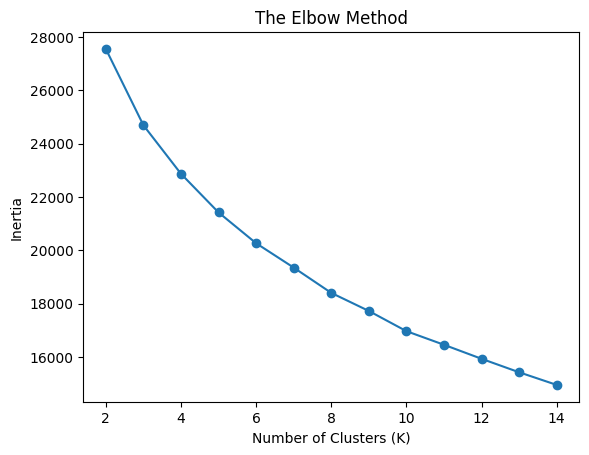

In [ ]:
inertia = []
K_vals = range(2,15)
for i in K_vals:

   kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
   kmeans.fit(X_scaled)
   inertia.append(kmeans.inertia_)


plt.plot(K_vals, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [ ]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(X_scaled)


In [17]:
# Evaluate clustering
score = silhouette_score(X_scaled, data['cluster'])
print(f"Silhouette Score for {k} clusters: {score:.4f}")


Silhouette Score for 10 clusters: 0.1488


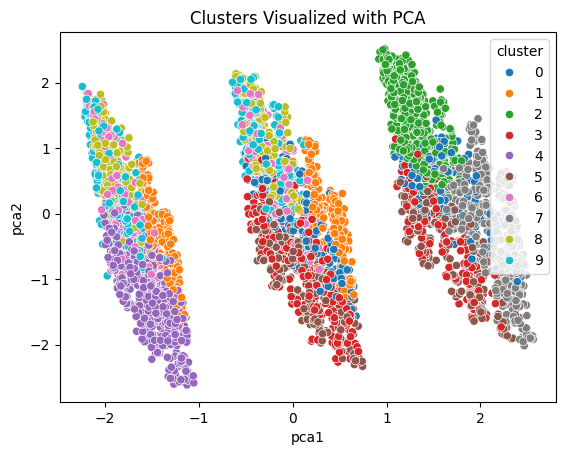

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['pca1'], data['pca2'] = X_pca[:, 0], X_pca[:, 1]


sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='tab10', data=data)
plt.title("Clusters Visualized with PCA")
plt.show()

In [18]:
# Baseline recommendation: most frequent product
baseline_recommendation = data['product_name'].value_counts().idxmax()
print("\nBaseline Recommendation (Most Frequent Product):", baseline_recommendation)


Baseline Recommendation (Most Frequent Product): Denim


In [21]:
#Simulating shopping cart
Shopping_cart = data.sample(5, random_state=42)
print("Current Shopping Cart:")
print(Shopping_cart[["product_name", "size", "colour", "price",]])



Current Shopping Cart:
      product_name size  colour  price
1501       Flannel    L  indigo     96
2586       Pleated   XL   green     90
2653   Windbreaker   XS  orange    109
1055  Cuban Collar    M  orange     93
705        Leather    L     red    113


In [22]:
# Recommend by most common
most_common_cluster = shopping_cart['cluster'].mode()[0]
cluster_products = data[data['cluster'] == most_common_cluster]

In [ ]:
recommendation = cluster_products[~cluster_products.index.isin(shopping_cart.index)].sample(1, random_state=42)

print("\n\U0001F3AF Recommended Item:")
print(recommendation[["product_name", "size", "colour", "price"]])


🎯 Recommended Item:
     product_name size  colour  price
2002     Chambray   XS  yellow    105


In [ ]:
#Model's error calculation


def evaluate_clustering(X_scaled, labels):
    print("🔍 Clustering Evaluation Metrics")
    print("="*35)

    sil_score = silhouette_score(X_scaled, labels)
    ch_score = calinski_harabasz_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)

    print(f"Silhouette Score       : {sil_score:.4f}  (Closer to 1 is better)")
    print(f"Calinski-Harabasz Index: {ch_score:.2f}   (Higher is better)")
    print(f"Davies-Bouldin Index   : {db_score:.4f}  (Lower is better)")
